# Assignment8

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [5]:
df.isna().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [6]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [7]:
df.shape

(804, 12)

In [8]:
df1 = df.drop_duplicates()
df1.shape

(804, 12)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,804.0,21343.143767,9884.852801,8638.930895,14273.07387,18024.995019,26717.316636,70755.466717
Mileage,804.0,19831.934080,8196.319707,266.000000,14623.50000,20913.500000,25213.000000,50387.000000
Cylinder,804.0,5.268657,1.387531,4.000000,4.00000,6.000000,6.000000,8.000000
Liter,804.0,3.037313,1.105562,1.600000,2.20000,2.800000,3.800000,6.000000
Doors,804.0,3.527363,0.850169,2.000000,4.00000,4.000000,4.000000,4.000000
Cruise,804.0,0.752488,0.431836,0.000000,1.00000,1.000000,1.000000,1.000000
Sound,804.0,0.679104,0.467111,0.000000,0.00000,1.000000,1.000000,1.000000
Leather,804.0,0.723881,0.447355,0.000000,0.00000,1.000000,1.000000,1.000000


In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() # gives no. of outliers

C:\Users\ashle\AppData\Local\Temp\ipykernel_4612\3037570416.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() # gives no. of outliers


Cruise      199
Cylinder      0
Doors       190
Leather       0
Liter         0
Make          0
Mileage       5
Model         0
Price        17
Sound         0
Trim          0
Type          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


Tasks, Part 1
Find the linear regression equation for mileage vs price.
Chart the original data and the equation on the chart.
Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

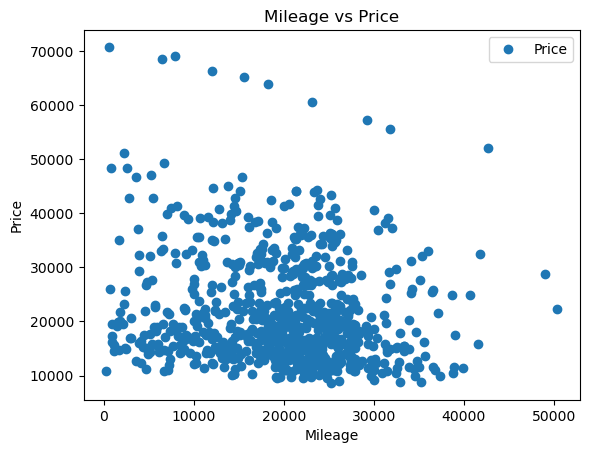

          Mileage     Price
Mileage  1.000000 -0.143051
Price   -0.143051  1.000000


In [13]:
#plot 
df.plot(x='Mileage', y='Price', style='o') 
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

print(df[["Mileage","Price"]].corr())

correlation of mileage Vs Price is -0.1403, which is >-0.2 and <0.2. so this is a negative correlation and we can try transforming.

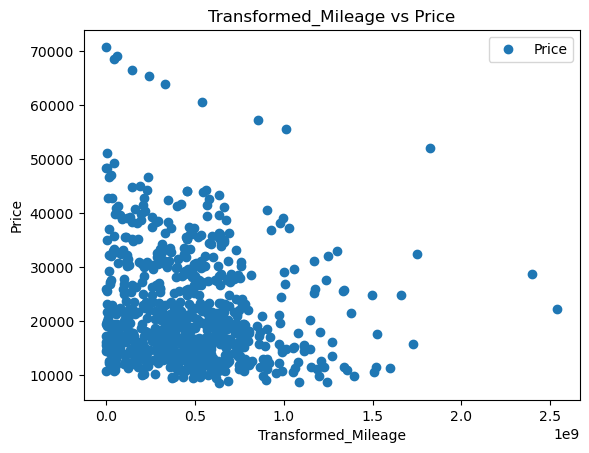

                     transformed_mileage     Price
transformed_mileage             1.000000 -0.117232
Price                          -0.117232  1.000000


In [15]:
import numpy as np
df['transformed_mileage'] = np.power(df['Mileage'],2) #sq transformation
df.plot(x='transformed_mileage', y='Price', style='o')
plt.title('Transformed_Mileage vs Price')
plt.xlabel('Transformed_Mileage')
plt.ylabel('Price')
plt.show()

print(df[["transformed_mileage","Price"]].corr()) 

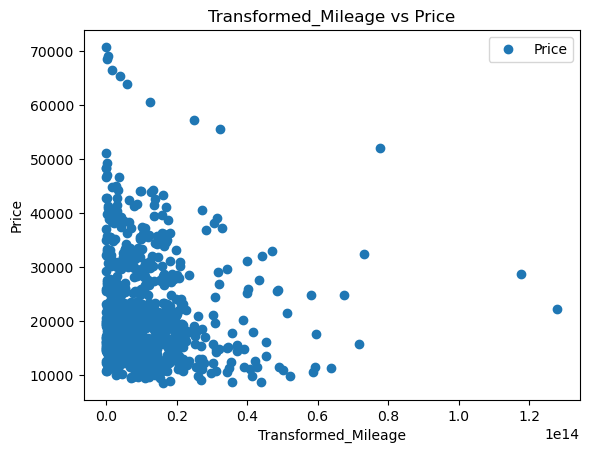

                     transformed_mileage     Price
transformed_mileage             1.000000 -0.085018
Price                          -0.085018  1.000000


In [16]:
import numpy as np
df['transformed_mileage'] = np.power(df['Mileage'],3) #cube transformation
df.plot(x='transformed_mileage', y='Price', style='o')
plt.title('Transformed_Mileage vs Price')
plt.xlabel('Transformed_Mileage')
plt.ylabel('Price')
plt.show()

print(df[["transformed_mileage","Price"]].corr()) 

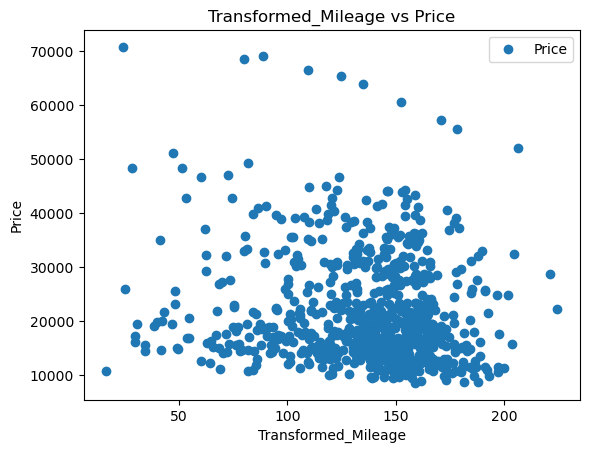

                     transformed_mileage     Price
transformed_mileage             1.000000 -0.149316
Price                          -0.149316  1.000000


In [17]:
import numpy as np
df['transformed_mileage'] = np.power(df['Mileage'],0.5) #sqrt transformation
df.plot(x='transformed_mileage', y='Price', style='o')
plt.title('Transformed_Mileage vs Price')
plt.xlabel('Transformed_Mileage')
plt.ylabel('Price')
plt.show()

print(df[["transformed_mileage","Price"]].corr())

C:\Users\ashle\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


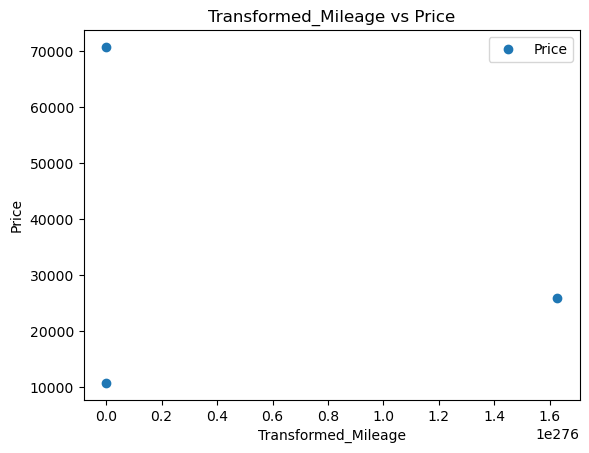

                     transformed_mileage  Price
transformed_mileage                  NaN   -0.0
Price                               -0.0    1.0


In [18]:
df['transformed_mileage'] = np.exp(df['Mileage']) #e^ transformation
df.plot(x='transformed_mileage', y='Price', style='o')
plt.title('Transformed_Mileage vs Price')
plt.xlabel('Transformed_Mileage')
plt.ylabel('Price')
plt.show()

print(df[["transformed_mileage","Price"]].corr())

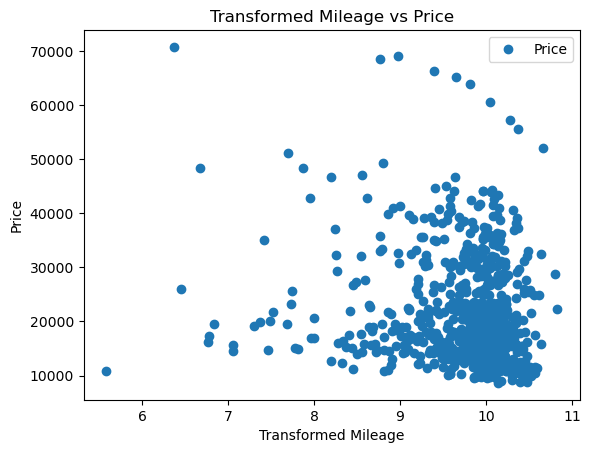

                     transformed_mileage     Price
transformed_mileage             1.000000 -0.145424
Price                          -0.145424  1.000000


In [19]:
df['transformed_mileage'] = np.log(df['Mileage']) #log transformation
df.plot(x='transformed_mileage', y='Price', style='o')
plt.title('Transformed Mileage vs Price')
plt.xlabel('Transformed Mileage')
plt.ylabel('Price')
plt.show()

print(df[["transformed_mileage","Price"]].corr())

even after all the transformations, the corr is still [-0.2< "correlation" >0.2] .

there is no linear relation ship between the target and the feature. but still we are heading towards trainig model and finding the R2 score as we are asked.

In [20]:
x = df[['Mileage']]
y = df[['Price']]

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

print('Linear regression equation y={}x+ {}'.format(regressor.coef_[0], regressor.intercept_))

print('intercept:', regressor.intercept_)# slope m
print('coefficients:', regressor.coef_)# intercept C
print('R2-score:', regressor.score(x, y))

Linear regression equation y=[-0.1725205]x+ [24764.55900606]
intercept: [24764.55900606]
coefficients: [[-0.1725205]]
R2-score: 0.02046344732348926


Text(0.5, 1.0, 'Mileage vs Price')

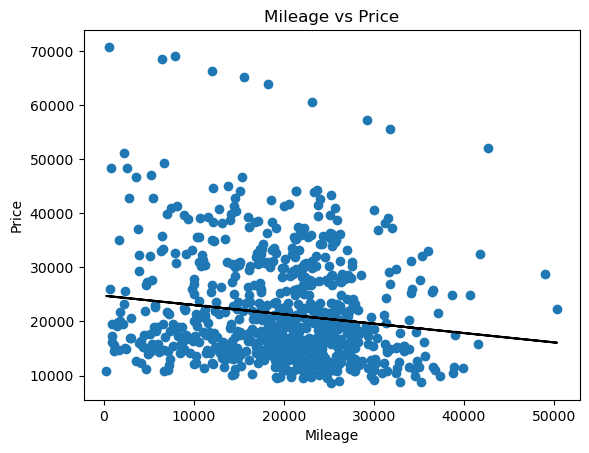

In [21]:
#Chart the original data and the equation on the chart.

plt.scatter(x, y)
plt.plot(x, regressor.predict(x),color="black")
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')

This is not a good fit,as R2=0.02 much <0.8

Tasks, Part 2
Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

Find the combination of the factors that is the best predictor for price.

In [22]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [23]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() # gives no. of outliers

C:\Users\ashle\AppData\Local\Temp\ipykernel_4612\3037570416.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() # gives no. of outliers


Cruise      199
Cylinder      0
Doors       190
Leather       0
Liter         0
Make          0
Mileage       5
Model         0
Price        17
Sound         0
Trim          0
Type          0
dtype: int64

as we are about to use Doors and Cruise in this task, we have to corrupt the outliers by capping.

In [24]:
print("Doors : ", len(df["Doors"].unique()))

print("Cruise : ", len(df["Cruise"].unique()))

Doors :  2
Cruise :  2


but the unique values of Doors and Cruise are only 2.they are categorical and are already label encoded as 0 and 1 .

In [25]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [26]:
X = df[['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values #array of features
y = df['Price'].values #array of targets

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler ## standrard scaling 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [29]:
#model training


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
y_pred = regressor.predict(X_test_scaled) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
#(y_pred)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,14862.093870,26841.569929
1,16256.236168,23107.117980
2,15802.652861,10715.787911
3,45061.951935,33065.377426
4,12425.389171,14351.796236
...,...,...
156,18548.978593,23567.742988
157,36332.894685,33476.069241
158,21683.031464,20174.792218
159,18040.144006,31235.598323


In [31]:

#print('Linear regression equation y={}x+ {}'.format(regressor.coef_[0], regressor.intercept_))
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred)) 

print('intercept:', regressor.intercept_)# slope m
print('coefficients:', regressor.coef_)# intercept C
#print('R2-score:', regressor.score(X_train_scaled, y_train))

R2- SCORE: 0.34021415975117064
intercept: 21286.771470559223
coefficients: [-1371.0011684   5362.75715593  -636.10279397 -1161.42189697
  2605.28366558 -1046.23562996  1599.92392244]


can't say this is a good fit

In [32]:
def combinations(L):
    if L:
        result=combinations(L[:-1])
        return result+[i+[L[-1]] for i in result]
    else: 
        return [[]]
    
#n=int(input())    
#jlist=list(map(int,input().split(" ")))[:n]
combi=combinations(['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather'])
combi=combi[1:]
print(combi) 
print(len(combi))  

[['Mileage'], ['Cylinder'], ['Mileage', 'Cylinder'], ['Liter'], ['Mileage', 'Liter'], ['Cylinder', 'Liter'], ['Mileage', 'Cylinder', 'Liter'], ['Doors'], ['Mileage', 'Doors'], ['Cylinder', 'Doors'], ['Mileage', 'Cylinder', 'Doors'], ['Liter', 'Doors'], ['Mileage', 'Liter', 'Doors'], ['Cylinder', 'Liter', 'Doors'], ['Mileage', 'Cylinder', 'Liter', 'Doors'], ['Cruise'], ['Mileage', 'Cruise'], ['Cylinder', 'Cruise'], ['Mileage', 'Cylinder', 'Cruise'], ['Liter', 'Cruise'], ['Mileage', 'Liter', 'Cruise'], ['Cylinder', 'Liter', 'Cruise'], ['Mileage', 'Cylinder', 'Liter', 'Cruise'], ['Doors', 'Cruise'], ['Mileage', 'Doors', 'Cruise'], ['Cylinder', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Doors', 'Cruise'], ['Liter', 'Doors', 'Cruise'], ['Mileage', 'Liter', 'Doors', 'Cruise'], ['Cylinder', 'Liter', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise'], ['Sound'], ['Mileage', 'Sound'], ['Cylinder', 'Sound'], ['Mileage', 'Cylinder', 'Sound'], ['Liter', 'Sound'], ['Mileage',

In [33]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [34]:
R2_Scores=[]
for i in combi:
  x_combi=df[i].values #combinations of features
  y = df['Price'].values #array of targets


  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(x_combi, y, test_size=0.2, random_state=0)

  from sklearn.preprocessing import StandardScaler ## standrard scaling 
  scaler=StandardScaler()#initialise to a variable
  scaler.fit(X_train) # we are finding the values of mean and sd from the td
  X_train_scaled=scaler.transform(X_train)# fit (mean, sd) and then transform the training data
  X_test_scaled=scaler.transform(X_test) #only transform the test dataset, dont fit it

 #model training
  from sklearn.linear_model import LinearRegression
  regressor = LinearRegression()
  regressor.fit(X_train_scaled, y_train)

  y_pred = regressor.predict(X_test_scaled) # given the features of the test dataset, it will give the final predictions
  from sklearn import metrics
  R2_Scores.append(metrics.r2_score(y_test,y_pred))

In [35]:
df2 = pd.DataFrame({'Feature_combinations': combi, 'R2_Scores': R2_Scores})
df2

,Feature_combinations,R2_Scores
0,[Mileage],0.016518
1,[Cylinder],0.198258
2,"[Mileage, Cylinder]",0.218955
3,[Liter],0.197812
4,"[Mileage, Liter]",0.222869
...,...,...
122,"[Mileage, Cylinder, Doors, Cruise, Sound, Leat...",0.338536
123,"[Liter, Doors, Cruise, Sound, Leather]",0.291480
124,"[Mileage, Liter, Doors, Cruise, Sound, Leather]",0.320187
125,"[Cylinder, Liter, Doors, Cruise, Sound, Leather]",0.316564


In [36]:
df2["R2_Scores"].max()

0.3415594929692144

In [37]:
df2["R2_Scores"].argmax()

94

In [38]:
df2["Feature_combinations"][df2["R2_Scores"].argmax()]

['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather']

the combination of factors which gave the maximum r2 score is ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather']].

But that maximum R2 score is not a good fit as it was 0.3415594929692144


Tasks, Hard Mode
Research dummy variables in scikit-learn to see how to use the make, model, and body type.

Find the best combination of factors to predict price.

In [39]:
temp = pd.DataFrame([[col,len(df[col].unique())] for col in df.columns])
temp.columns = ['Feature', 'Unique']
temp

,Feature,Unique
0,Price,798
1,Mileage,791
2,Make,6
3,Model,32
4,Trim,47
5,Type,5
6,Cylinder,3
7,Liter,16
8,Doors,2
9,Cruise,2


eventhough there are only 4 object types data , the columns["Cruise","Sound","Leather"] are binary coded with 2 unique values each and ["Doors"] also has only 2 unique values these 4 can also be considered categorical variables.

also,cylinder(3) and liter(16) are also categorical

so except mileage and price all other variables are caytegorrical. now we need to see if we can drop any of these based on correlation.

In [40]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


as we can see here Cylinder has a corr of 0.569 and liter has a corr of 0.558. both are positively correlated with "Price". Since we are about to OneHot Encode every categorical variable, and we have highly correlted ["Liter", "Cylinder"] , we can drop ['liter'] column as it has 16 unique values, also this will lead to numerical instability of the model.

"For linear models (e.g., linear regression or logistic regression), multicolinearity can yield solutions that are wildly varying and possibly numerically unstable."

as we can see all categorical features are nominal variables(ie) there is no order in them.

nominal variables are encoded using Scikit-learn OneHotEncoder while ordinal variables are encoded using Scikit-learn OrdinalEncoder.

But we have numerous unique items in each category, which when one hot encoded will add numerous columns to data frame.

In [41]:
df = pd.read_csv("car_data.csv")
df.drop(columns = ["Liter"], axis=1, inplace= True)
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,4,1,0,1


In [42]:
cat_var = ['Make','Model','Type','Cylinder','Doors','Cruise','Sound','Leather','Trim']
con_var = list(set(df.columns) - set(cat_var))

print('Categorical Variables\n',cat_var,'\n\n',
      'Continuous Variables\n', con_var)

Categorical Variables
 ['Make', 'Model', 'Type', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather', 'Trim'] 

 Continuous Variables
 ['Price', 'Mileage']


In [ ]:
for i in combi:
  x_combi=[]
  for j in i:
    if j in cat_var:
      encoded = pd.get_dummies(df, columns =i, drop_first = False)
      x_combi=(df[encoded].values) #combinations of features
    else:
      X_combi=(df[i])
  #x_=[(pd.get_dummies(j)) for j in i if j in cat_var]
  y = df['Price'].values #array of targets

  #encoding
  #dummy encoding/oneHotEncoding cat variables

 # df = pd.get_dummies(df, columns = cat_var, drop_first = False)

In [44]:
df= pd.get_dummies(df, columns =['Make', 'Model', 'Type','Trim'], drop_first = False)
df

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,Make_Chevrolet,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,17314.103129,8221,6,4,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17542.036083,9135,6,4,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,16218.847862,13196,6,4,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16336.913140,16342,6,4,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,16339.170324,19832,6,4,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,6,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
800,16175.957604,19095,6,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
801,15731.132897,20484,6,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
802,15118.893228,25979,6,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


from just 11 columns it went to 97 columns after onehot encoding

In [45]:
#group features in X and target in  y
X= df.iloc[:,1:]
y= df.iloc[:,0]

In [46]:
# splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

#scaling 
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it


# Model Training
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#prediction
y_pred = regressor.predict(X_test)

#scoring
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9902154955301047


In [47]:
df.columns 

Index(['Price', 'Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather',
       'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Pontiac',
       'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD', 'Model_9_3',
       'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon', 'Trim_AWD Sportwagon 4D',
       'Trim_Aero Conv 2D', 'Trim_Aero Sedan 4D', 'Trim_Aero Wagon 4D',
       'Trim_Arc Conv 2D', 'Trim_Arc Sedan 4D', 'Tr

In [48]:
df = pd.read_csv("car_data.csv")
df.drop(columns = ["Liter"], axis=1, inplace= True)

to_encode=['Make','Model','Type','Trim']

In [49]:
def combinations(L):
    if L:
        result=combinations(L[:-1])
        return result+[i+[L[-1]] for i in result]
    else: 
        return [[]]
    
#n=int(input())    
#jlist=list(map(int,input().split(" ")))[:n]
combi=combinations(['Make','Model','Type','Cylinder','Doors','Cruise','Sound','Leather','Trim','Mileage']) 
combi=combi[1:]
print(combi)

[['Make'], ['Model'], ['Make', 'Model'], ['Type'], ['Make', 'Type'], ['Model', 'Type'], ['Make', 'Model', 'Type'], ['Cylinder'], ['Make', 'Cylinder'], ['Model', 'Cylinder'], ['Make', 'Model', 'Cylinder'], ['Type', 'Cylinder'], ['Make', 'Type', 'Cylinder'], ['Model', 'Type', 'Cylinder'], ['Make', 'Model', 'Type', 'Cylinder'], ['Doors'], ['Make', 'Doors'], ['Model', 'Doors'], ['Make', 'Model', 'Doors'], ['Type', 'Doors'], ['Make', 'Type', 'Doors'], ['Model', 'Type', 'Doors'], ['Make', 'Model', 'Type', 'Doors'], ['Cylinder', 'Doors'], ['Make', 'Cylinder', 'Doors'], ['Model', 'Cylinder', 'Doors'], ['Make', 'Model', 'Cylinder', 'Doors'], ['Type', 'Cylinder', 'Doors'], ['Make', 'Type', 'Cylinder', 'Doors'], ['Model', 'Type', 'Cylinder', 'Doors'], ['Make', 'Model', 'Type', 'Cylinder', 'Doors'], ['Cruise'], ['Make', 'Cruise'], ['Model', 'Cruise'], ['Make', 'Model', 'Cruise'], ['Type', 'Cruise'], ['Make', 'Type', 'Cruise'], ['Model', 'Type', 'Cruise'], ['Make', 'Model', 'Type', 'Cruise'], ['Cyl

In [50]:
R2_Scores=[]
for i in combi:
  
  x_combi=df[i] #combinations of features
  y = df['Price'].values #array of targets

  
  #dummy encoding/oneHotEncoding cat variables
  x_combi=pd.get_dummies(x_combi,columns=[k for k in to_encode if k in x_combi.columns])
  

  #splitting
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(x_combi, y, test_size=0.2, random_state=0)


  #scaling is needed only when "mileage" is in the featrures.
  if "Mileage" in X_train:
    from sklearn.preprocessing import StandardScaler ## standrard scaling 
    scaler=StandardScaler()#initialise to a variable
    scaler.fit(X_train) # we are finding the values of mean and sd from the td
    X_train=scaler.transform(X_train)# fit (mean, sd) and then transform the training data
    X_test=scaler.transform(X_test) #only transform the test dataset, dont fit it

 #model training
  from sklearn.linear_model import LinearRegression
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)

#prediction and score
  y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
  from sklearn import metrics
  R2_Scores.append(metrics.r2_score(y_test,y_pred))

In [51]:
df3 = pd.DataFrame({'Feature_combinations': combi, 'R2_Scores': R2_Scores})
df3

,Feature_combinations,R2_Scores
0,[Make],0.592826
1,[Model],0.951327
2,"[Make, Model]",0.950010
3,[Type],0.327325
4,"[Make, Type]",0.736135
...,...,...
1018,"[Make, Model, Cylinder, Doors, Cruise, Sound, ...",0.992356
1019,"[Type, Cylinder, Doors, Cruise, Sound, Leather...",0.898330
1020,"[Make, Type, Cylinder, Doors, Cruise, Sound, L...",0.962098
1021,"[Model, Type, Cylinder, Doors, Cruise, Sound, ...",0.992581


In [52]:
print(df3["R2_Scores"].max())

print(df3["R2_Scores"].argmax())
df3["Feature_combinations"][df3["R2_Scores"].argmax()]

0.9931327934425875
1013


['Model', 'Type', 'Doors', 'Cruise', 'Sound', 'Leather', 'Trim', 'Mileage']